<a href="https://colab.research.google.com/github/Kim-Yeonjoo/DeepLearning/blob/main/8_1_CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

캐나다 토론토 대학교에서 제작한 데이터셋
제프리 힌턴에 데이터셋 제작에 참여
구성 : 32 x 32 x 3의 컬러이미지 데이터 - 총 60000개의 이미지
50000개의 트레이닝용 이미지
10000개의 검증용 이미지
10개의 데이터 종류별로 6000개의 이미지


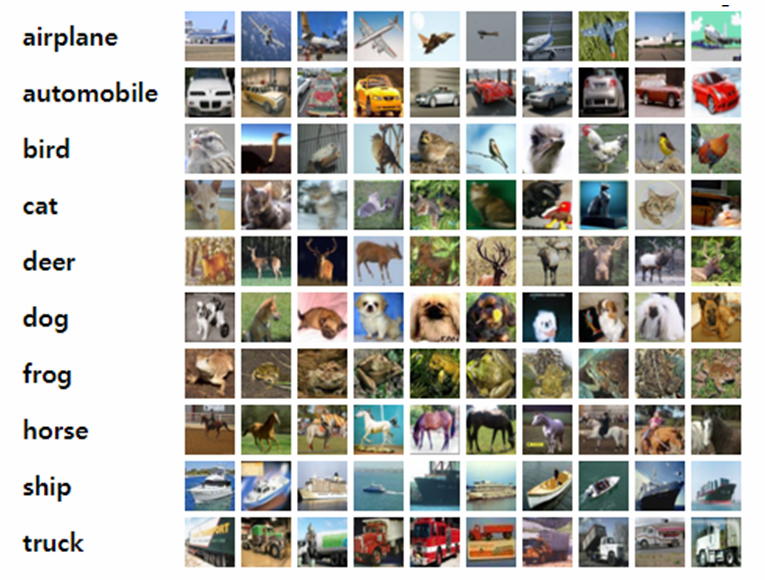

In [9]:
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from sklearn.metrics import classification_report

In [3]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float")/255
testX = testX.astype("float")/255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
lb = LabelBinarizer()

trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [5]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [6]:
opt = SGD(learning_rate=0.01)

height = 32
width = 32
depth =3

model = Sequential()
inputShape = (height, width, depth)

if K.image_data_format() == "channels_first":
	inputShape = (depth, height, width)



In [10]:
# 모델의 구성
inputs = Input(shape=inputShape)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [11]:
# 모델 설정
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
# 모델 훈련
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 105ms/step - accuracy: 0.2071 - loss: 2.1486 - val_accuracy: 0.3772 - val_loss: 1.7443
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.4015 - loss: 1.6737 - val_accuracy: 0.4757 - val_loss: 1.4577
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 85ms/step - accuracy: 0.4816 - loss: 1.4554 - val_accuracy: 0.5304 - val_loss: 1.3249
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 92ms/step - accuracy: 0.5273 - loss: 1.3298 - val_accuracy: 0.5325 - val_loss: 1.3108
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 87ms/step - accuracy: 0.5700 - loss: 1.2154 - val_accuracy: 0.5828 - val_loss: 1.1606
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.6037 - loss: 1.1243 - val_accuracy: 0.5911 - val_loss: 1.1552
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 174s 107ms/step - accuracy: 0.6356 - loss: 1.0462 - val_accuracy: 0.6141 - val_loss: 1.0950
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 98ms/step - accuracy

In [13]:
# 모델 평가
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print(f'Loss: {loss:.3f}, Accuracy: {accuracy:.3f}')

Loss: 0.996, Accuracy: 0.657


In [19]:
# 모델 예측
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
              precision    recall  f1-score   support

    airplane       0.71      0.75      0.73      1000
  automobile       0.78      0.79      0.79      1000
        bird       0.54      0.58      0.56      1000
         cat       0.48      0.45      0.46      1000
        deer       0.78      0.41      0.54      1000
         dog       0.44      0.78      0.56      1000
        frog       0.81      0.64      0.72      1000
       horse       0.79      0.64      0.71      1000
        ship       0.75      0.82      0.78      1000
       truck       0.77      0.72      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.69      0.66      0.66     10000
weighted avg       0.69      0.66      0.66     10000



In [17]:
# 모델 2
from tensorflow import keras
from tensorflow.keras import layers

inputs_2 = keras.Input(shape=(32,32,3))

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs_2)
x = layers.MaxPooling2D(pool_size=2)(x)


x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)


x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)


outputs_2 = layers.Dense(10, activation='softmax')(x)

model_2 = keras.Model(inputs=inputs_2, outputs=outputs_2)

#컴파일
model_2.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

#학습
history_2 = model_2.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.3498 - loss: 1.7747 - val_accuracy: 0.5570 - val_loss: 1.2310
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.5818 - loss: 1.1849 - val_accuracy: 0.5746 - val_loss: 1.1932
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6625 - loss: 0.9744 - val_accuracy: 0.6301 - val_loss: 1.1243
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7069 - loss: 0.8533 - val_accuracy: 0.6517 - val_loss: 1.0525
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.7399 - loss: 0.7531 - val_accuracy: 0.6750 - val_loss: 0.9497
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7657 - loss: 0.6853 - val_accuracy: 0.6938 - val_loss: 0.9748
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 54ms/step - accuracy: 0.7870 - loss: 0.6224 - val_accuracy: 0.7006 - val_loss: 0.9524
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 50ms/step - accuracy: 0.8107 

In [18]:
# 모델2 평가
loss, accuracy = model_2.evaluate(testX, testY, verbose=0)
print(f'Loss: {loss:.3f}, Accuracy: {accuracy:.3f}')

Loss: 1.065, Accuracy: 0.696


In [20]:
# 모델 예측
predictions = model_2.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.75      0.75      1000
  automobile       0.90      0.75      0.82      1000
        bird       0.48      0.76      0.59      1000
         cat       0.58      0.48      0.53      1000
        deer       0.65      0.65      0.65      1000
         dog       0.79      0.42      0.55      1000
        frog       0.62      0.89      0.73      1000
       horse       0.91      0.60      0.72      1000
        ship       0.80      0.82      0.81      1000
       truck       0.77      0.84      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.69     10000
weighted avg       0.72      0.70      0.69     10000



In [21]:
# 추론파일 저장
model_2.save('cifar10_cnn.h5')

# 추론

In [22]:
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np
from google.colab.patches import cv2_imshow

In [23]:
model_i = load_model('./cifar10_cnn.h5')

In [24]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

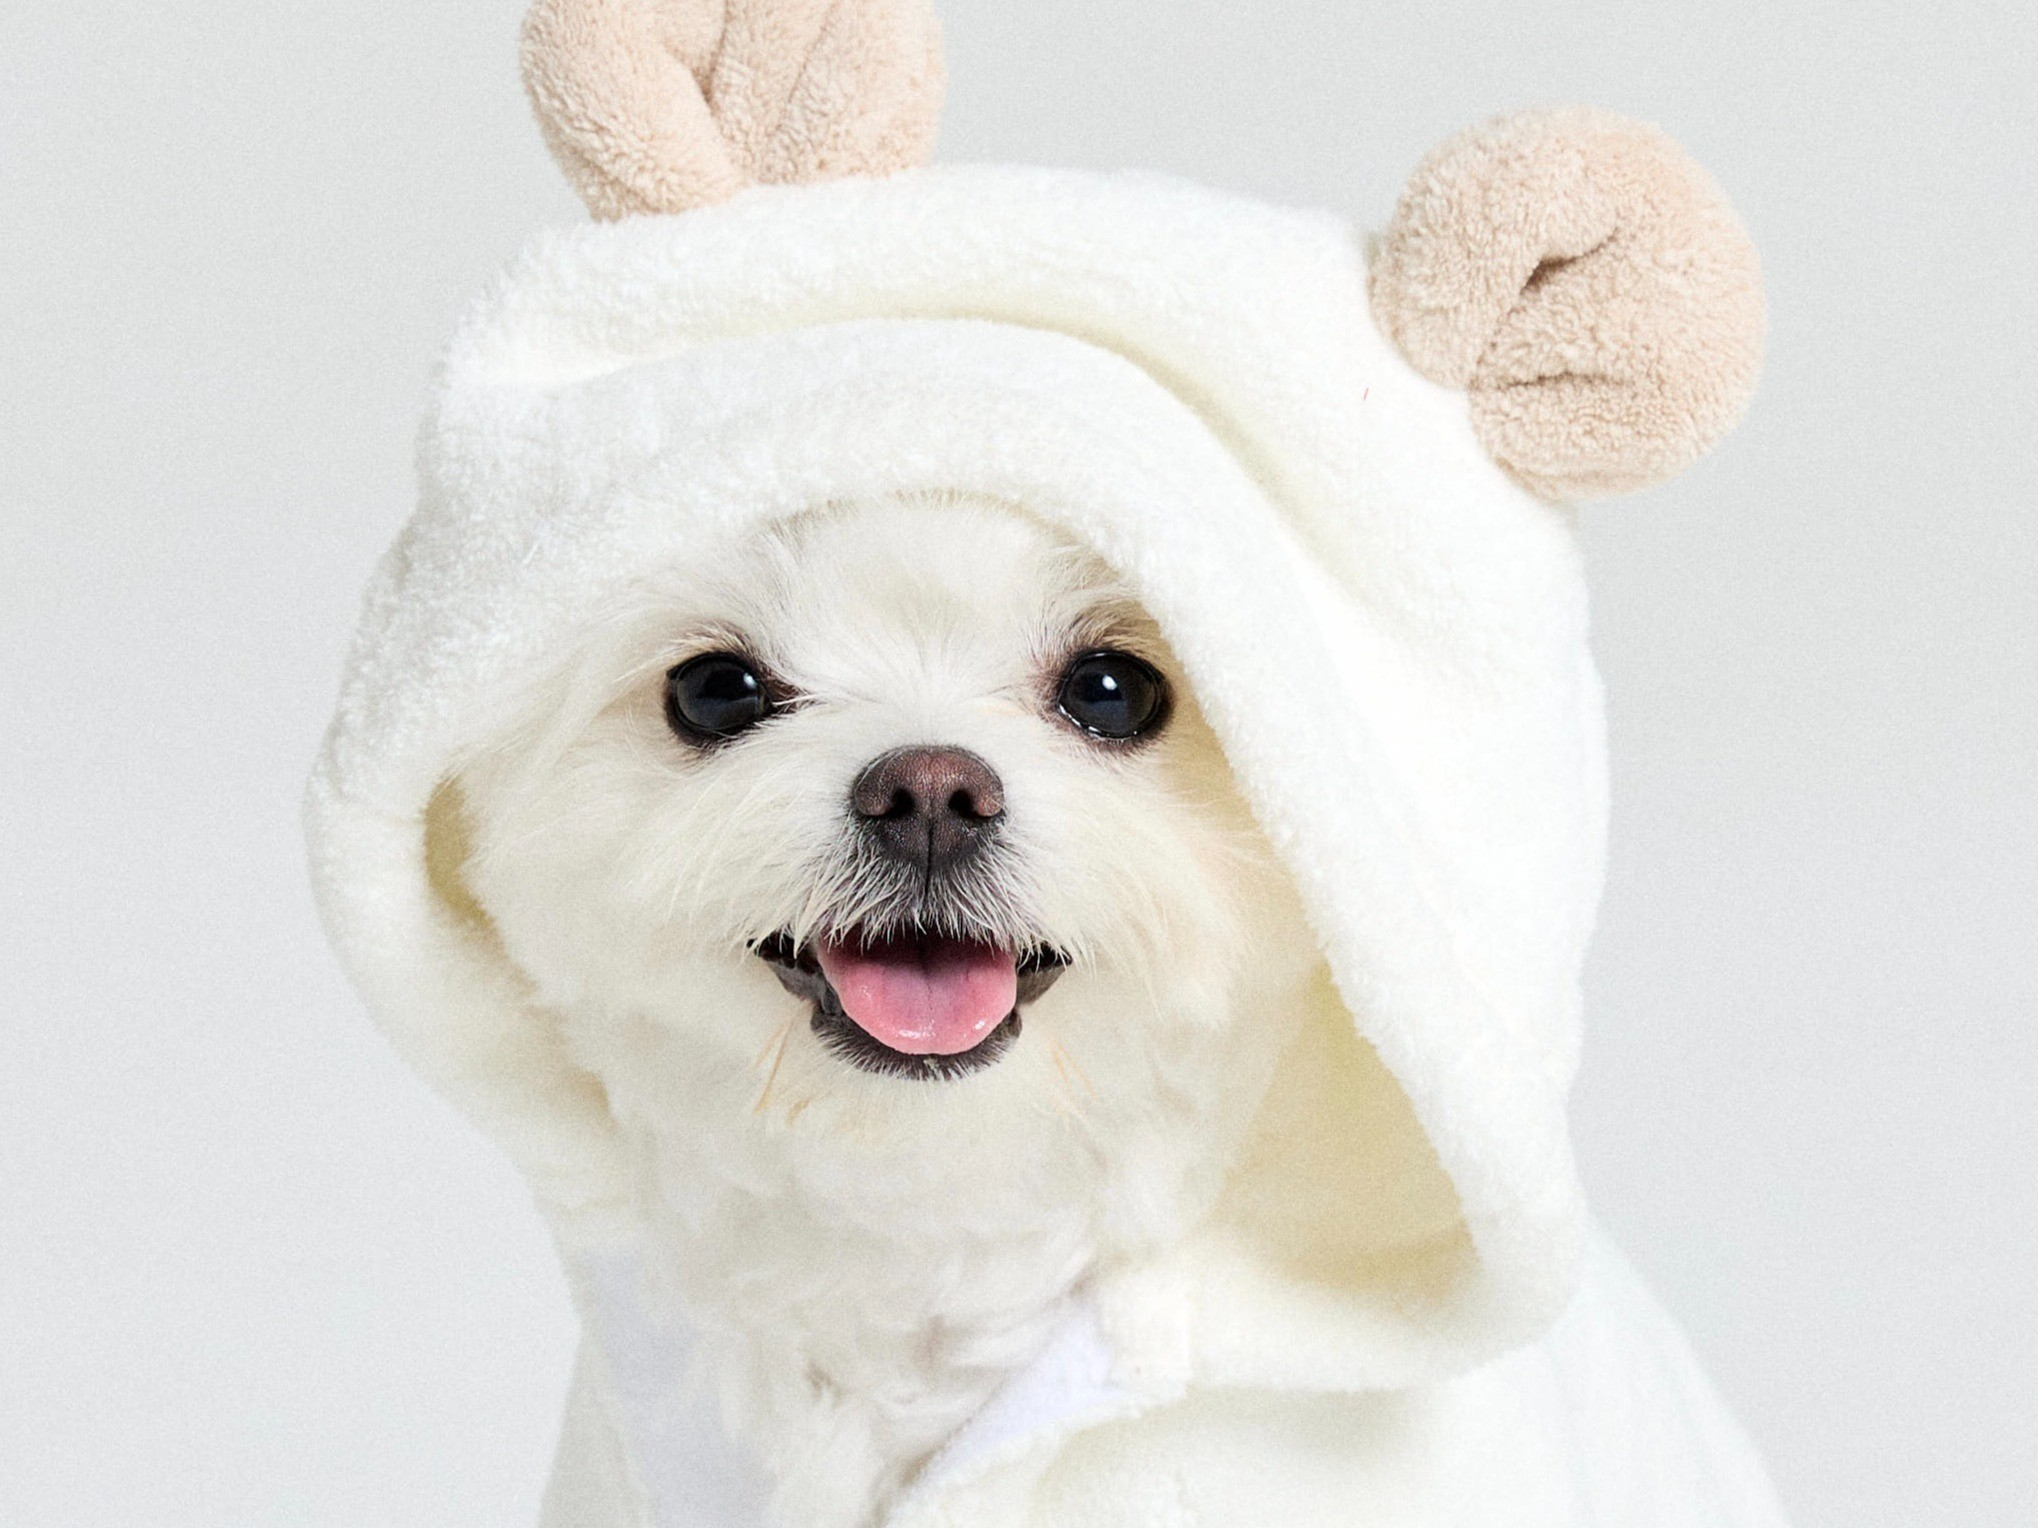

In [25]:
# 내가 판단할 이미지를 로드 OpenCV로 한다.
img = cv2.imread('./dog.jpg')
cv2_imshow(img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

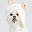

In [26]:
img_resized = cv2.resize(img, (32,32))
cv2_imshow(img_resized)
cv2.waitKey(2000)
cv2.destroyAllWindows()

In [28]:
img_norm = img_resized.astype('float')/255.0

In [29]:
X = np.asarray([img_norm])

predictions = model(X, training=False)

print(predictions)
print(np.argmax(predictions))

tf.Tensor(
[[8.52356434e-01 1.15980605e-04 1.12740040e-01 1.50190229e-02
  1.37312210e-03 1.59563906e-02 1.59972894e-03 2.62004469e-04
  5.38075750e-04 3.91302237e-05]], shape=(1, 10), dtype=float32)
0


In [30]:
from tensorflow import keras
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


In [32]:
# 모델의 구성
from tensorflow.keras import Input, layers, models

# CNN Layers
inputs = Input(shape=inputShape)
x = data_augmentation(inputs)
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

# Flatten and Dense Layers
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 생성
model = models.Model(inputs=inputs, outputs=outputs)
# 모델 설정
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"] )
# 모델 훈련
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs =10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.3489 - loss: 1.7641 - val_accuracy: 0.5371 - val_loss: 1.3145
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.5678 - loss: 1.2097 - val_accuracy: 0.6152 - val_loss: 1.0878
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.6389 - loss: 1.0286 - val_accuracy: 0.6317 - val_loss: 1.0616
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.6727 - loss: 0.9266 - val_accuracy: 0.6713 - val_loss: 0.9530
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.6964 - loss: 0.8629 - val_accuracy: 0.6847 - val_loss: 0.9086
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7226 - loss: 0.7942 - val_accuracy: 0.6923 - val_loss: 0.8925
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7408 - loss: 0.7415 - val_accuracy: 0.6889 - val_loss: 0.8909
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 49ms/step - accuracy: 0.7560 -

In [33]:
# 모델 예측
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

    airplane       0.70      0.77      0.73      1000
  automobile       0.86      0.79      0.82      1000
        bird       0.70      0.51      0.59      1000
         cat       0.58      0.49      0.53      1000
        deer       0.64      0.72      0.68      1000
         dog       0.63      0.63      0.63      1000
        frog       0.77      0.82      0.79      1000
       horse       0.76      0.74      0.75      1000
        ship       0.83      0.80      0.82      1000
       truck       0.68      0.86      0.76      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

